In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

df = pd.read_csv('house_price.csv')
df

print(df.info())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

In [3]:
# Check the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000    

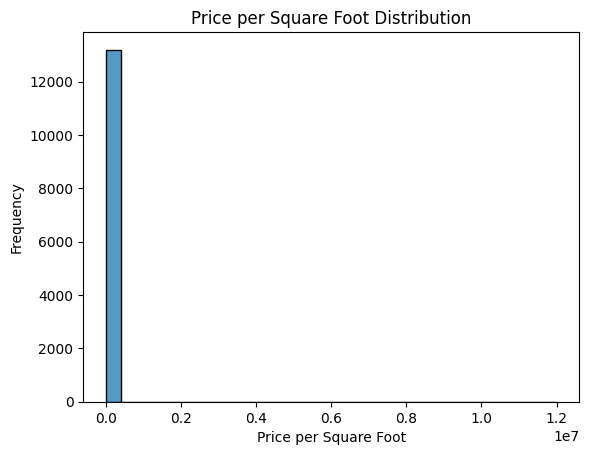

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price_per_sqft'], bins=30)
plt.title('Price per Square Foot Distribution')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()


In [7]:
print(df.dtypes)
print(df.nunique())


location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object
location           241
size                31
total_sqft        1972
bath                19
price             1952
bhk                 19
price_per_sqft    4951
dtype: int64


In [8]:
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()
threshold = 3  # Z-score threshold
df_trimmed = df[(df['price_per_sqft'] >= mean - threshold * std_dev) & 
                 (df['price_per_sqft'] <= mean + threshold * std_dev)]


In [9]:
lower_bound = df['price_per_sqft'].quantile(0.01)
upper_bound = df['price_per_sqft'].quantile(0.99)
df_trimmed = df[(df['price_per_sqft'] >= lower_bound) & 
                 (df['price_per_sqft'] <= upper_bound)]


In [10]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
df_trimmed = df[(df['price_per_sqft'] >= Q1 - 1.5 * IQR) & 
                 (df['price_per_sqft'] <= Q3 + 1.5 * IQR)]


In [11]:
from scipy import stats

df['z_score'] = stats.zscore(df['price_per_sqft'])
df_trimmed = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]


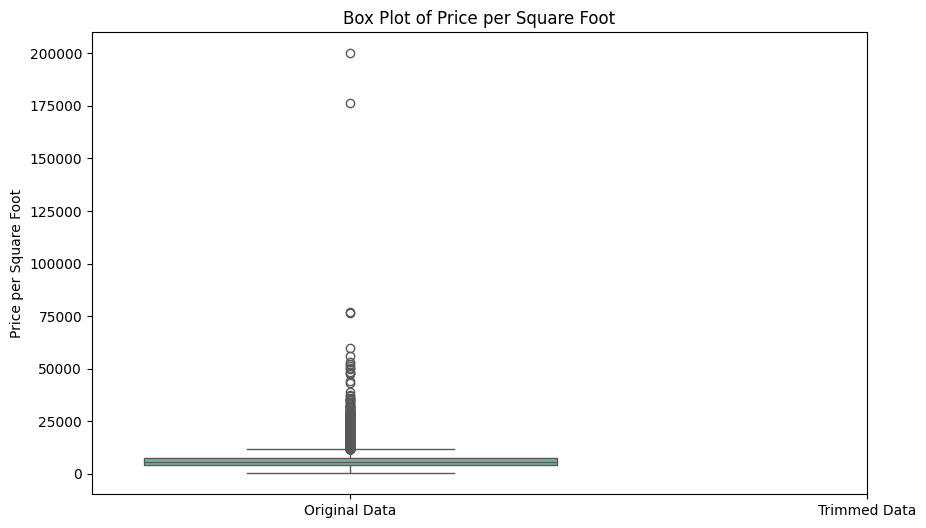

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['price_per_sqft'], df_trimmed['price_per_sqft']], 
             orient='vertical', palette='Set2')
plt.xticks([0, 1], ['Original Data', 'Trimmed Data'])
plt.title('Box Plot of Price per Square Foot')
plt.ylabel('Price per Square Foot')
plt.show()


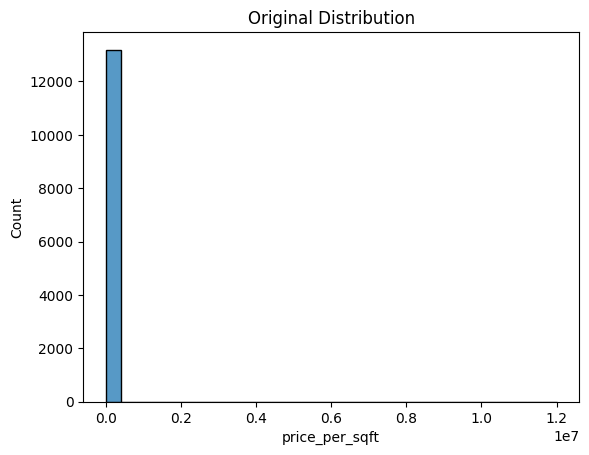

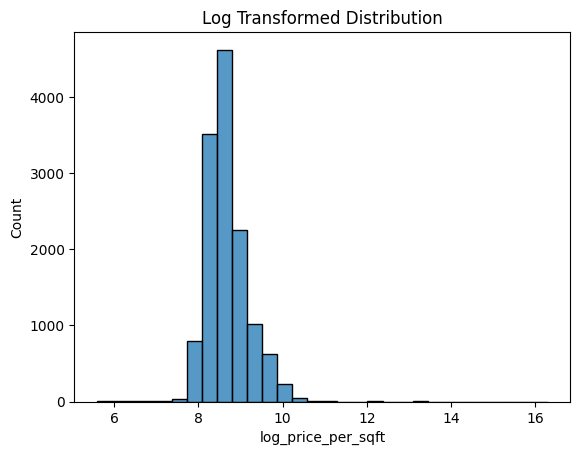

In [7]:
import numpy as np

# Initial histogram
sns.histplot(df['price_per_sqft'], bins=30)
plt.title('Original Distribution')
plt.show()

# Perform log transformation
df['log_price_per_sqft'] = np.log(df['price_per_sqft'])
sns.histplot(df['log_price_per_sqft'], bins=30)
plt.title('Log Transformed Distribution')
plt.show()



In [8]:
df = df.apply(pd.to_numeric, errors='coerce')

In [9]:
correlation_matrix = df.corr()

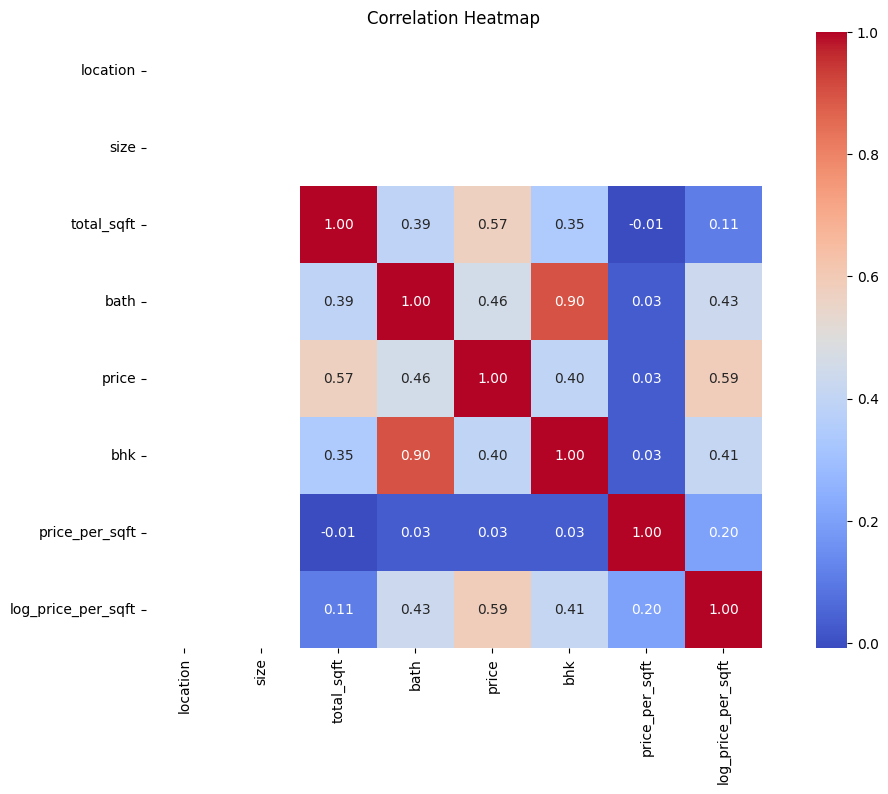

In [10]:
plt.figure(figsize=(14, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Correlation Heatmap')

plt.show()

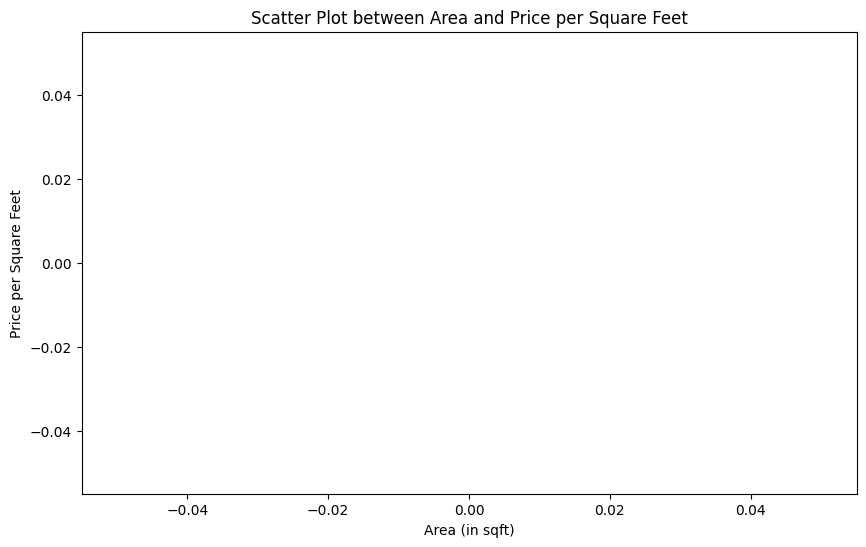

In [11]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='location', y='price_per_sqft')

plt.title('Scatter Plot between Area and Price per Square Feet')

plt.xlabel('Area (in sqft)')

plt.ylabel('Price per Square Feet')

plt.show()

In [12]:
from scipy.stats import skew, kurtosis

original_skew = skew(df['price_per_sqft'])
original_kurt = kurtosis(df['price_per_sqft'])
log_skew = skew(df['log_price_per_sqft'])
log_kurt = kurtosis(df['log_price_per_sqft'])

print(f'Original Skewness: {original_skew}, Kurtosis: {original_kurt}')
print(f'Log Transformed Skewness: {log_skew}, Kurtosis: {log_kurt}')


Original Skewness: 108.26875024325159, Kurtosis: 12090.633538860382
Log Transformed Skewness: 1.3997035748119977, Kurtosis: 9.199636085376468


In [15]:
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numeric columns
correlation_matrix = df_numeric.corr()
